# So, I wanna build a really simple carbon system based on my map that regulated glycolysis and gluconeogenesis based on glucose storage. 

 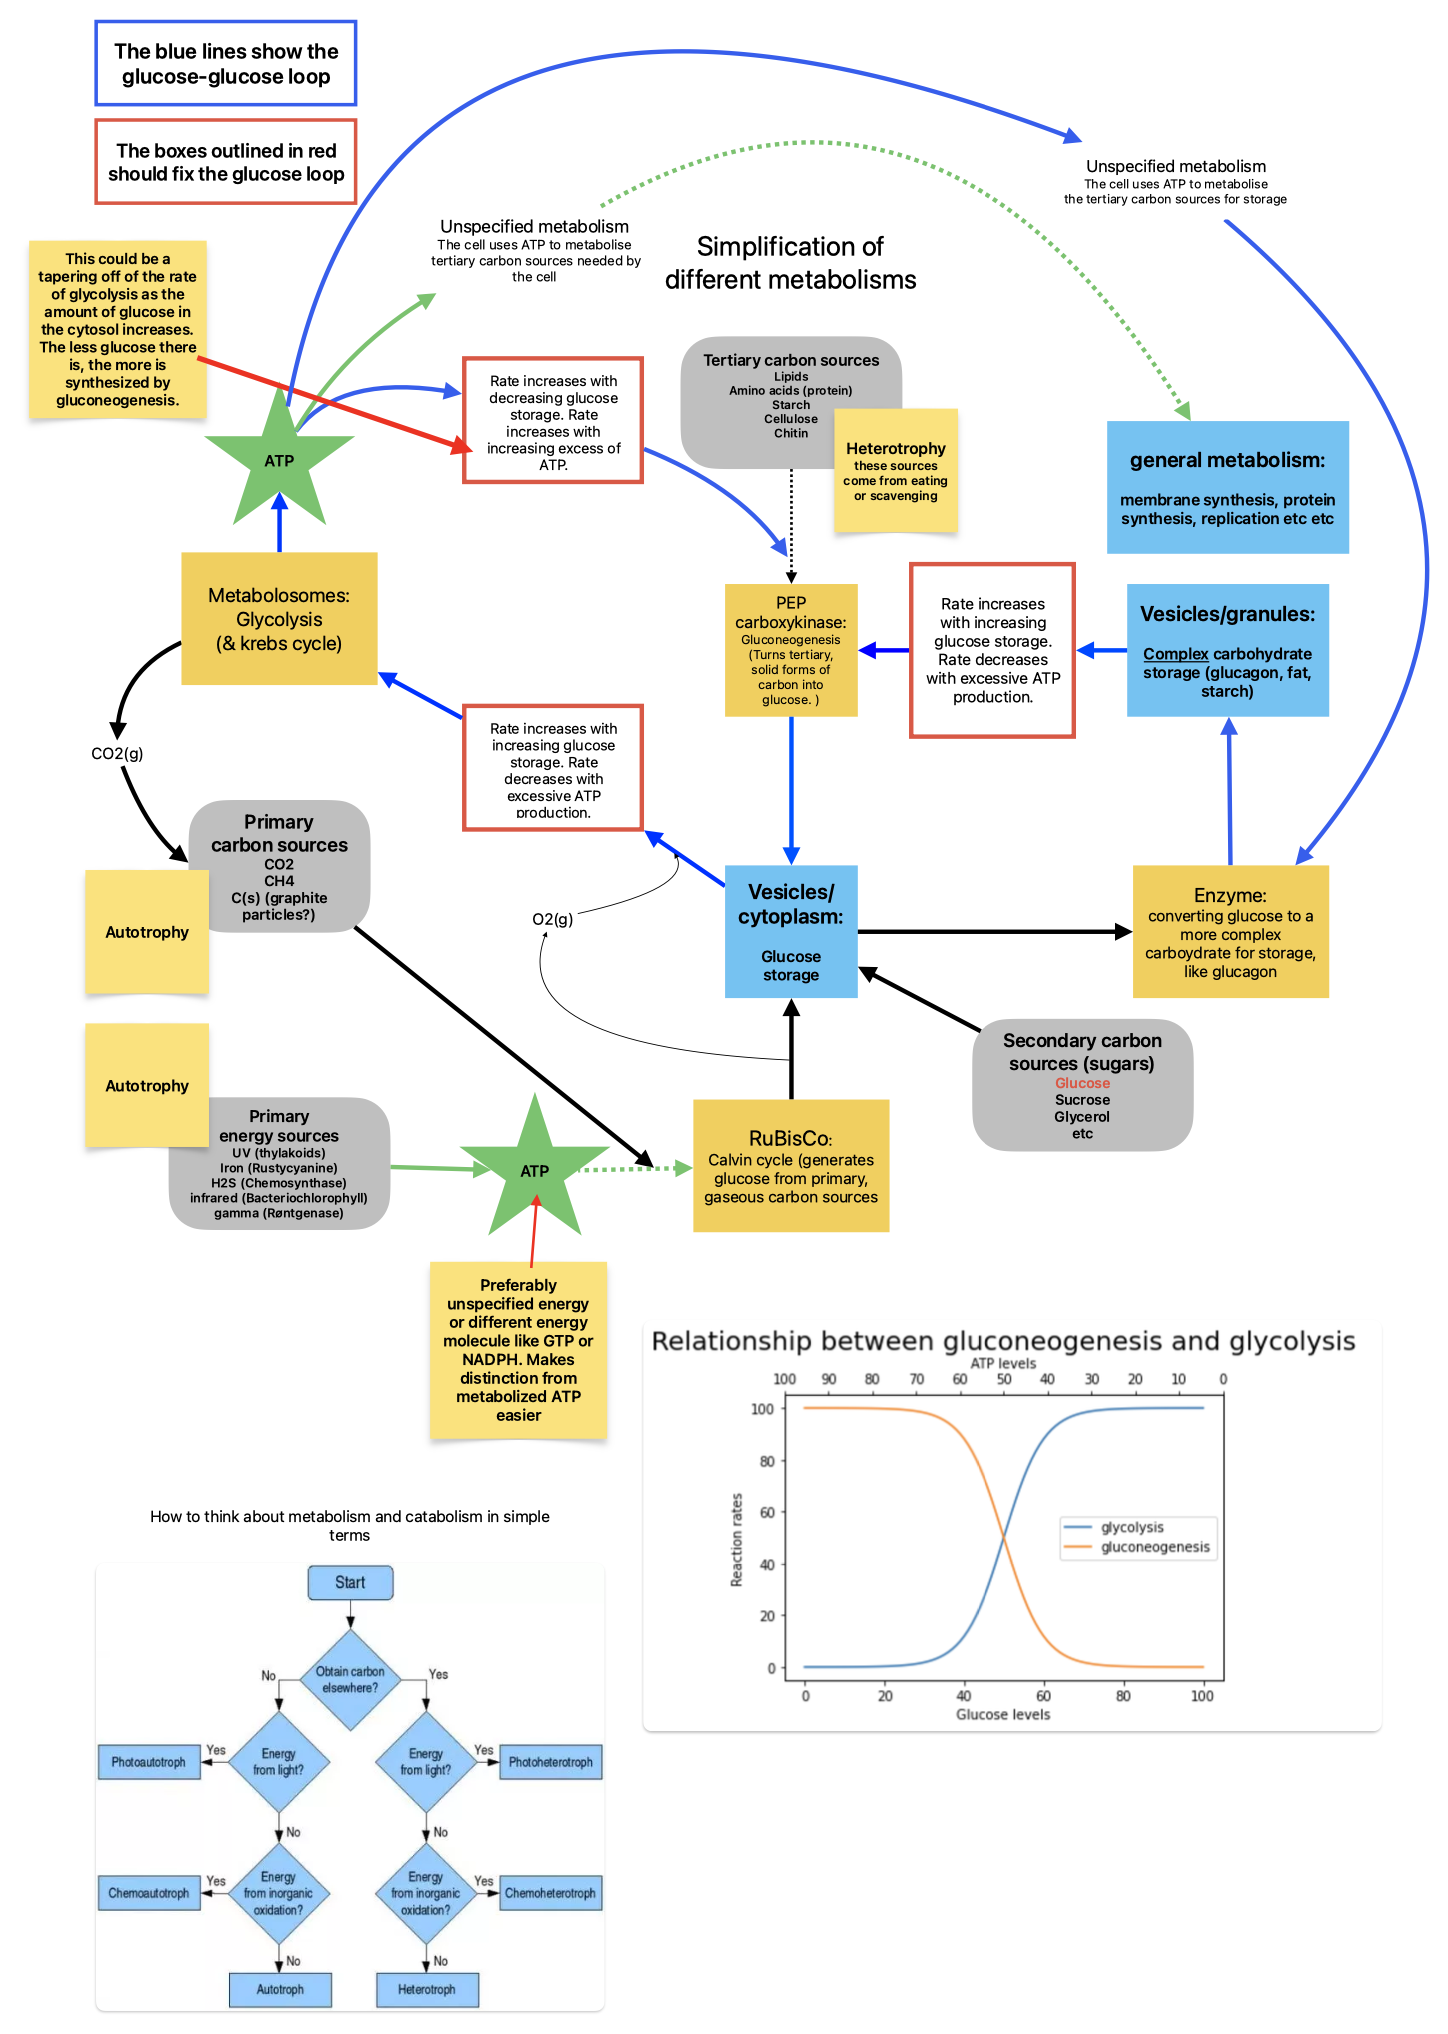

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Functions

to get the reaction rates rigth, these two functions must be implemented: 


glycolysis = $$\frac{L}{1+e^{ -k*x-x_0}}$$


gluconeogenesis = $$\frac{L}{1+e^{ k*x-x_0}}$$


where 


x: is the stored glucose levels


L: glucose_storage


k: steepness of reaction rate curve (0.2 is good)


x0: L/2 or midpoint of the rate (where the change in y is the highest

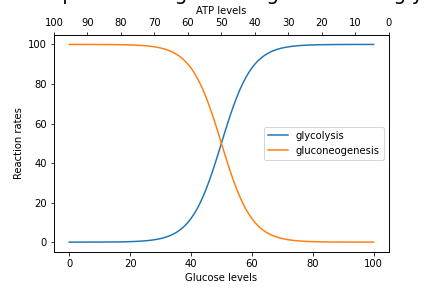

glycolysis_rrate = lambda L, k, x : L/(1+np.exp(-k*(x-(L/2))))
gluconeogenesis_rrate = lambda L, k, x : L/(1+np.exp(k*(x-(L/2))))
Calvin_rrate = lambda L, k, x : L/(1+np.exp(k*(x-(L/2))))
photoynth_rrate = lambda L, k, x : L/(1+np.exp(-k*(x-(L/2)))) # depends on photons, x
eating_rate = 10

def glycolysis (glucose, oxygen):
    
    ATP = 0
    CO2 = 0
    
    length = min(glucose, oxygen)
    for i in range(length):
        
        ATP += 1
        CO2 += 1
        glucose -= 1
        oxygen -= 1

    return (ATP, CO2, glucose, oxygen)

def gluconeogenesis (ATP, food, glu_storage):
    # food is also complex carbohydrate storage
    
    glucose = 0
    
    length = min(ATP, food)
    for i in range(length):
        while abs(glu_storage - glucose) >= 0: 
            glucose += 1
            ATP -= 1
            food -= 1

    return (ATP, glucose, food, glu_storage)


def calvin_cycle(CO2, ATP, NADPH): 
    # 18 ATP and 12 NADPH are also required
    NADP = 0
    glucose = 0
    O2 = 0
    
    while ATP >= 18 and NADPH >= 12 and CO2>= 6: #and H20 >=6, not necessary since the bacteria are in the water this can be ignored for now
        CO2 -= 6
        #H2O -= 6
        NADPH -= 12
        ATP -= 18
        
        NADP += 12
        glucose += 1
        O2 += 6
        
    #length = abs(min(CO2,H2O)/6) #6 CO2 and 6 H20 are required for 1 molecule of glucose
    
    #for i in range(length): 
    
    return CO2, ATP, NADPH, NADP, O2, glucose #H2O

def photosynthesis (photon): # 2 H2O is also used, but since the bacteria are in the water this can be ignored for now.
    O2 += 0
    ATP += 0
    NADPH += 0
    
    while photon >= 8: 
        O2 += 1
        ATP += 4
        NADPH += 2
    
    return O2, ATP, NADPH

#photosynth_rrate = lambda L, k, x : L/(1+np.exp(-k*(x-(L/2)))) # depends on photons, x


def glucose_lvls (env, genesis_calvin, lysis, glu_store): #genesis_calvin is both gluconeogenesis and calvin cycle
    glucose = sum([env, genesis_calvin]) - lysis
    if glucose >= glu_store: # prevents the glucose levels to surpass storage capacity
        glucose = glu_store
        
    elif glucose <= 0: #prevents negative glucose levels
        glucose = 0
        
    else: # if glucose is less than the max storage allowed and is over 0
        glucose = glucose
        
    return (glucose)


def metabolism (ATP): # the metabolic rate is gonna be 4 unless ATP = 0. This should be scaled based on cell size = glucose storage
    if ATP > 0:
        meta = 4
    else: 
        meta = 0
    return meta


def eating(env_glucose, local_glucose): 
    local_glucose += max_glucose - local_glucose + env_glucose
    return (env_glu, local_glu)

In [18]:
glycolysis_rrate = lambda L, k, x : L/(1+np.exp(-k*(x-(L/2))))
gluconeogenesis_rrate = lambda L, k, x : L/(1+np.exp(k*(x-(L/2))))
Calvin_rrate = lambda L, k, x : L/(1+np.exp(k*(x-(L/2))))
photoynth_rrate = lambda L, k, x : L/(1+np.exp(-k*(x-(L/2)))) # depends on photons, x
eating_rate = 10

def glycolysis (glucose, oxygen):
    # local variables: 
    ATPG = 30
    glucoseG = -1
    CO2G = 6
    oxygenG = -6
    
    if glucose >= 1 and oxygen >= 6: 
        return (ATPG, glucoseG, CO2G, oxygenG)

def gluconeogenesis (ATP, pyruvate, glu_storage):
    # pyruvate = food is also complex carbohydrate storage
    #pyruvate is C3O3-
    
    # local variables: 
    ATPGen = -4
    glucoseGen = 1
    pyruvateGen = -2
        
    if ATP >= 4 and pyruvate >= 2 and glu_storage >= 1: 
        return ATPGen, glucoseGen, pyruvateGen




def photosynthesis(photon): # 2 H2O is also used, but since the bacteria are in the water this can be ignored for now.
        #LOCAL VARIABLES
    O2P = 1
    ATPP = 4        
    NADPHP = 2
    if photon >= 8: 
        return ATPP, O2P, NADPHP

#photosynth_rrate = lambda L, k, x : L/(1+np.exp(-k*(x-(L/2)))) # depends on photons, x



def calvin_cycle(CO2, ATP, NADPH): 
    # 18 ATP and 12 NADPH are also required
    #and H20 >=6, not necessary since the bacteria are in the water this can be ignored for now
    
    ATP2 = -18
    glucose2 = 1
    CO22 = -6
    NADPH2 = -12
    
    if CO2 >= 6 and NADPH >= 12 and ATP >= 18:  
        return ATP2, glucose2, CO22, NADPH2 #H2O
    else: 
        raise ValueError("the amount of one of the components is too low!")

#Return prder: ATP, glucose, CO2, O2, pyruvate, NADPH, glustorage

Other functions: 


In [19]:

def glucose_lvls (env, genesis_calvin, lysis, glu_store): #genesis_calvin is both gluconeogenesis and calvin cycle
    glucose = sum([env, genesis_calvin]) - lysis
    if glucose >= glu_store: # prevents the glucose levels to surpass storage capacity
        glucose = glu_store
        
    elif glucose <= 0: #prevents negative glucose levels
        glucose = 0
        
    else: # if glucose is less than the max storage allowed and is over 0
        glucose = glucose
        
    return (glucose)


def metabolism (ATP): # the metabolic rate is gonna be 4 unless ATP = 0. This should be scaled based on cell size = glucose storage
    if ATP > 0:
        meta = 4
    else: 
        meta = 0
    return meta


def eating(env_glucose, local_glucose): 
    local_glucose += max_glucose - local_glucose + env_glucose
    return (env_glu, local_glu)

Mass balance equations (ODEs):

In [20]:
TotC = lambda glu, CO_2, food: glu*6 + CO_2 + food*12 # food is only 12 C for now
TotATP = lambda glycolysis_glu, autotrophic_ATP, movement_ATP, metabolism_ATP, calvin, gluconeo: glycolysis_glu*30 + autotrophic_ATP - movement_ATP - metabolism_ATP - calvin - gluconeo
TotO2 = lambda autotrophic_ATP, metabolism, glycolysis_glu: 4*autotrophic_ATP - metabolism - glycolysis_glu
TotCO2 = lambda glycolysis, calvin: glycolysis*4 - calvin*6

x = lambda a, b : a * b

Testing glycolysis

In [21]:
CO2_env = 10
ATP_ = 0
glucose_ = 10
O2_ = 12

max_storage = 100
glucose_storage_capacity = max_storage - glucose_

#print("starting vals = ", "ATP = ",  ATP_, "CO2 =", CO2_env, "glucose = ", glucose_, "O2 = ", O2_)
print()

ATP = ATP_ + glycolysis(glucose_, O2_)[0]
print("ATP before = ",  ATP_)
print("ATP generated = ", glycolysis(glucose_, O2_)[0])
print("ATP after = ", ATP)
print()

glucose = glucose_ + glycolysis(glucose_, O2_)[1]
print("glucose before = ", glucose_)
print("glucose consumed = ", glycolysis(glucose_, O2_)[1])
print("glucose after= ", glucose)

print()

CO2 = CO2_env + glycolysis(glucose_, O2_)[2]
print("CO2 before = ", CO2_env)
print("CO2 generated = ", glycolysis(glucose_, O2_)[2])
print("CO2 after= ", CO2)
print()

oxygen = O2_ + glycolysis(glucose_, O2_)[3]
print("O2 before = ", O2_)
print("O2 consumed = ", glycolysis(glucose_, O2_)[3])
print("O2 after= ", oxygen)
print()

glucose_storage_capacity_2 = max_storage - glucose
print("Glucose storage available (of 100) before glycolysis = ", glucose_storage_capacity)
print("Glucose storage available (of 100) after glycolysis = ", glucose_storage_capacity_2)


ATP before =  0
ATP generated =  30
ATP after =  30

glucose before =  10
glucose consumed =  -1
glucose after=  9

CO2 before =  10
CO2 generated =  6
CO2 after=  16

O2 before =  12
O2 consumed =  -6
O2 after=  6

Glucose storage available (of 100) before glycolysis =  90
Glucose storage available (of 100) after glycolysis =  91


testing gluconeogenesis: 

In [22]:
food_pyruvate = 20 # worth 3 C each
#print("Food before gluconeogenesis= ", food_pyruvate)

print()
print("After gluconeogenesis:")
#Gluconeo: 

ATP_neo = ATP + gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[0]
print("ATP before = ", ATP)
print("ATP consumed= ", gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[0])
print("ATP after = ", ATP_neo)
print()

glucose_neo = glucose + gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[1]
print("glucose before = ", glucose)
print("glucose produced= ", gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[1])
print("glucose after = ", glucose_neo)
print()

food_neo = food_pyruvate + gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[2]
print("food before = ", food_pyruvate)
print("food consumed= ", gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[2])
print("food after = ", food_neo)
print()

glucose_storage_capacity_neo = glucose_storage_capacity_2 + gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[1]
print("glucose stored before = ", glucose_storage_capacity_2)
print("glucose produced= ", gluconeogenesis(ATP, food_pyruvate, glucose_storage_capacity)[1])
print("glucose stored after = ", glucose_storage_capacity_neo)
print()


After gluconeogenesis:
ATP before =  30
ATP consumed=  -4
ATP after =  26

glucose before =  9
glucose produced=  1
glucose after =  10

food before =  20
food consumed=  -2
food after =  18

glucose stored before =  91
glucose produced=  1
glucose stored after =  92



Testing photosynthesis: 

In [23]:
photons = 10**10
print("the amount of photons hitting the cell at this moment:", photons)
NADPH = 0 

food_pyruvate = 20 # worth 3 C each
#print("Food before gluconeogenesis= ", food_pyruvate)

print()
print("After photosynthesis:")

ATP_Photo = ATP_neo + photosynthesis(photons)[0]
print("ATP before = ", ATP_neo)
print("ATP produced = ", photosynthesis(photons)[0])
print("ATP after = ", ATP_Photo)
print()

oxygen_photo = oxygen + photosynthesis(photons)[1]
print("O2 before = ", oxygen)
print("O2 produced= ", photosynthesis(photons)[1])
print("O2 after = ", oxygen_photo)
print()


NADPH_photo = NADPH + photosynthesis(photons)[2]
print("The starting amount of NADPH: ", NADPH)
print("NADPH produced= ", photosynthesis(photons)[2])
print("NADPH after= ", NADPH_photo)


the amount of photons hitting the cell at this moment: 10000000000

After photosynthesis:
ATP before =  26
ATP produced =  4
ATP after =  30

O2 before =  6
O2 produced=  1
O2 after =  7

The starting amount of NADPH:  0
NADPH produced=  2
NADPH after=  2


Testing Calvin

In [24]:
print("After Calvin cycle")

# Calvin cycle
ATP_C = ATP + calvin_cycle(CO2, ATP, NADPH_photo)[0]
print("ATP used = ", calvin_cycle(CO2, ATP, NADPH_photo)[0])
print("ATP tot= ", ATP_C)

ATP_C = ATP_photo + calvin_cycle(CO2, ATP, NADPH_photo)[0]
print("ATP before = ", ATP_photo)
print("ATP consumed = ", calvin_cycle(CO2, ATP, NADPH_photo)[0])
print("ATP after = ", ATP_C)
print()

glucose_C = glucose_neo + calvin_cycle(CO2, ATP, NADPH_photo)[1]
print("glucose before = ", glucose_neo)
print("glucose produced = ", calvin_cycle(CO2, ATP, NADPH_photo)[1])
print("glucose after = ", glucose_C)
print()

CO2_C = CO2 + calvin_cycle(CO2, ATP, NADPH_photo)[2]
print("CO2 before = ", CO2)
print("CO2 consumed = ", calvin_cycle(CO2, ATP, NADPH_photo)[2])
print("CO2 after = ", CO2_C)
print()

NADPH_C = NADPH_photo + calvin_cycle(CO2, ATP, NADPH_photo)[3]
print("NADPH before = ", NADPH_photo)
print("NADPH consumed = ", calvin_cycle(CO2, ATP, NADPH_photo)[3])
print("NADPH after = ", NADPH_C)
print()

glucose_storage_capacity_C = max_storage + glucose_C
print("Glucose storage available (of 100) before calvin = ", glucose_storage_capacity_neo)
print("Glucose storage available (of 100) after calvin = ", glucose_storage_capacity_C)



After Calvin cycle


ValueError: the amount of one of the components is too low!

Testing glucose_lvls

In [ ]:
glucose_local = glucose_lvls(2, 10, 3, 20) # amount of glucose currently stored in the cell
print(glucose_local)

In [ ]:
def testing(x): 
    hi = 3*x
    d = 1
    return  d, hi
print(testing(2))

# levels before
CO2 = 20
H2O = 20
ATP = 100
NADPH = 40
glucose = 10
O2 = 30
NADP = 12

print(calvin_cycle(CO2, H2O, ATP, NADPH))

#levels after
CO2_2 = calvin_cycle(CO2, H2O, ATP, NADPH)[0]
H2O_2 = calvin_cycle(CO2, H2O, ATP, NADPH)[1]
ATP_2 = calvin_cycle(CO2, H2O, ATP, NADPH)[2]
NADPH_2 = calvin_cycle(CO2, H2O, ATP, NADPH)[3]
NADP_2 = NADP + calvin_cycle(CO2, H2O, ATP, NADPH)[4]
O2_2 = O2 + calvin_cycle(CO2, H2O, ATP, NADPH)[5]
glucose2 = glucose + calvin_cycle(CO2, H2O, ATP, NADPH)[6]


print(glucose2)
    
    #return CO2, H2O, ATP, NADPH, NADP, O2, glucose

Testing rates. 

How fast is glycolysis and gluconeogenesis when glucose lvls are 60%?

In [ ]:
glucose_storage = 100
glucose_lvls = 60

rate_glycolysis = glycolysis_rrate(glucose_storage, 0.2, glucose_lvls, glucose_storage/2)
rate_gluconeogenesis = gluconeogenesis_rrate(glucose_storage, 0.2, glucose_lvls, glucose_storage/2)
print (rate_glycolysis)
print (rate_gluconeogenesis)

#glycolysis_rrate = lambda L, k, x, x0 : L/(1+np.exp(-k*(x-x0)))
#gluconeogenesis_rrate = lambda L, k, x, x0 : L/(1+np.exp(k*(x-x0)))

The glucose levels in the environment around a single cell were measured to be 200 at the start of the experiment. What would the glucose levels be if they were measured every minute over the course of 1 hr? How much CO2 would be produced and how much oxygen would be consumed every minute?

In [ ]:
glucoseenv_start = 200 
CO2_start = 10
O2_start = 500
food = 0
steepness = 0.2
UV = np.zeros(61) + 100 #%
print(UV)
# The cell storage, local glucose levels etc: 
glucose_storage = 50 # L
local_glu_start = 0 # x
local_ATP_start = 0
local_NADPH_start = 0

# lists to add all the values to: 
time = np.arange(0, 61, 1)
# environment
glu_env = []
CO2 = []
O2 = []
food = []

#local
glu_local = []
ATP = []
NADPH = []

# loops:
for i in range(time): 
    photo_synth = photosynthesis(UV)
    Calvin = calvin_cycle(CO2_start, local_ATP_start, local_NADPH_start)
    

In [ ]:
#time (min): 
t = np.arange(0, 61, 1); #print(t)
#glucose levels
gl = np.arange(40, 101,1); env_gl = gl[::-1]; #print(env_gl)
# CO2: 
C = np.zeros(len(t)); CO2 = 


In [ ]:
env_glu = int(input()) # the amount of glucose eaten by the cell
glucose_storage = 100 # the max amount of glucose the cell can store
env_O2 = int(input()) # the amount of O2 around the cell that can be absorbed by the cell from the environment

ATP = glycolysis(env_glu, env_O2)[0]
print("ATP = ", ATP)
CO2 = glycolysis(env_glu, env_O2)[1]
print("CO2 = ", CO2)
glucose = glycolysis(env_glu, env_O2)[2]
print("glucose = ", glucose)
oxygen = glycolysis(env_glu, env_O2)[3]
print("O2 = ", oxygen)

glucose_local = glucose_lvls(env_glu, 0, ATP, 100) # amount of glucose currently stored in the cell
print("leftover, stored glucose = ", glucose_local)

# the energy here is either from glycolysis 
def gluconeogenesis(ATP, carbonsource, O2):
	glucose = ATP + carbonsource + O2
	CO2_env == glucose_local 					# CO2 is released
	ATP -= 1
	O2_env -= 1
	return (glucose_local, CO2_env, O2_env, ATP)

# The energy here is from autotrophic sources (UV, H2S etc)
def Calvin():
	glucose += UV + CO2
	O2 == glucose 			# oxygen is released
	CO2 -= 1
	return (glucose, O2, CO2)

def glycolysis(): 
	ATP += 1
	glucose -= 1
	return (ATP, glucose)


# amount of glucose available to the cell, either via environment or metabolism.
glucose = sum(env_glu + gluconeogenesis + Calvin_cycle)

#the amount of space that can store glucose is determined by amount of cytosol and vesicles
glucose_storage = 100

# any level between 0-1
glucose_levels = glucose/glucose_storage

for i in range (len(

when glucose_levels => 70% glucose_storage: 
gluconeogenesis_rate/2
else

Based on prosjektoppgave 2018. Newtons method: 
    
# Oppgave 1a: Implementering av Newtons metode

### Implementering 
Du skal levere en Python-funksjon i verktøymodulen som implementerer Newtons metode for likningen f(x) = 0, der den deriverte funksjonen f'(x)
antas kjent. Funksjonen skal oppfylle følgende:

• Funksjonen skal returnere den siste approksimative roten funnet ved iterasjon
inntil tilstrekkelig nøyaktighet er oppnådd eller til et maksimalt antall iterasjoner
er tatt.

• Funksjonen skal ta en funksjon og dens deriverte som parametre samt et startgjett,
et maksimalt antall iterasjoner og en toleranseparameter.
• Funksjonen skal kunne gjenkjenne det singulære tilfellet f
0
(xk ) = 0 og terminere
ved å kaste en exception av type ValueError . Funksjonen skal også kaste en
exception dersom antall maxit iterasjoner er nådd uten konvergens.


• Funksjonen skal ha en docstring og ellers skrives på en lett forståelig måte med
kommentarer.


Det er viktig å tenke på at funksjonen skal inngå i en større sammenheng, det vil si
at den skal være lett å anvende på ulike problemer. Et eksempel på et funksjonskall kan
være
1 from birkutil import newton_solve
2 (x, n) = newton_solve(f, df, x0, maxit = 50, epsilon = 1e-8)
Testing. Skriv en test-funksjon i en testfil: opprett en .py-fil med navn som starter
på test_, f.eks. test_newton.py. Filen skal inneholde en eller flere funksjoner med
navn som starter på test_ . Se ellers læreboka/forelesningene om testfunksjoner.
Testfunksjonene skal teste implementeringen av Newtons metode på f (x) = x
2 −4,
med initialverdier x0 = −1 og 1, og også 0. Newton-iterasjonen skal konvergere til −2
og 2 for de to første tilfellene, og for det siste tilfellet skal du sjekke at funksjonen kaster
en ValueError , siden f
0
(0) = 0.
Bruk maxit = 50 og epsilon = 10−12 i testfunksjonen. Se for øvrig forelesningene/læreboka om unit testing og exception handling.

In [ ]:
import numpy as np